# AND merge target and indicator

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv")
# Temporary solution
import sys
sys.path.insert(0, '..')
import useful_functions as uf
import target as target

In [35]:
len(df)

1988738

In [36]:
# Import indicators
from ta.volatility import UlcerIndex
from ta.momentum import StochasticOscillator
from ta.trend import CCIIndicator
from ta.trend import SMAIndicator
from ta.momentum import PercentagePriceOscillator


In [45]:
# ui = UlcerIndex(df.close, window=100)
# df["ui"] = ui.ulcer_index()

# i = StochasticOscillator(df.close, df.high, df.low, 54, 9)
# df["sr"] = i.stoch_signal()

i = PercentagePriceOscillator(df.close, 100, 40, 20)
df["ppo"] = i.ppo()

# i = SMAIndicator(df.close, window=100) #50
# sma_50_rate = uf.get_rate(i.sma_indicator())
# df["sma"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), sma_50_rate))

In [46]:
d = df[-5000:-2000]

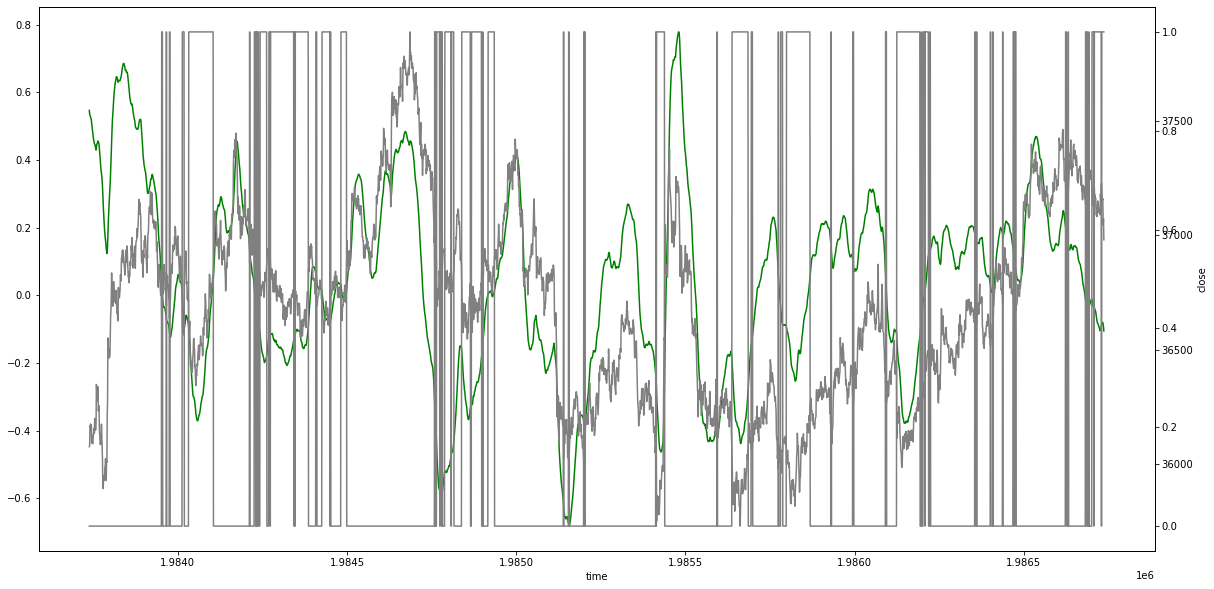

In [47]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.ppo,
        color="green")
ax.set_xlabel("time")
# ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax3=ax.twinx()
ax3.plot(d.target,
         color="gray")


ax2.set_ylabel("close")
plt.show()

(array([5.900000e+01, 1.510000e+02, 4.330000e+02, 2.868000e+03,
        4.514100e+04, 1.868787e+06, 6.841100e+04, 2.337000e+03,
        3.840000e+02, 6.800000e+01]),
 array([-6.43938643, -5.28213927, -4.12489211, -2.96764495, -1.81039779,
        -0.65315063,  0.50409653,  1.66134369,  2.81859085,  3.97583801,
         5.13308517]),
 <BarContainer object of 10 artists>)

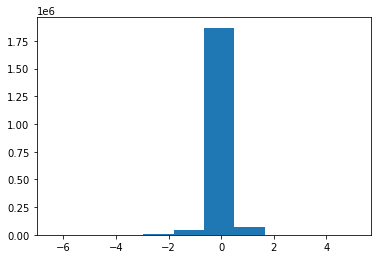

In [48]:
plt.hist(df["ppo"])

In [41]:
df["target_base"] = df.target
df.target_base.value_counts(), df.target_base.value_counts()[1]/(df.target_base.value_counts()[1]+df.target_base.value_counts()[0])

(0.0    1363174
 1.0     624563
 Name: target_base, dtype: int64,
 0.3142080667613472)

In [49]:
# df["atr_classified"] = uf.classify(df.ui, 0.5)
# df.atr_classified.value_counts(), df.atr_classified.value_counts()[1]/df.atr_classified.value_counts()[0]

df["i_classified"] = uf.classify(list(map(lambda x: -x, df.ppo)), 0.01)
df.i_classified.value_counts(), df.i_classified.value_counts()[1]/(df.i_classified.value_counts()[1]+df.i_classified.value_counts()[0])


(0    1110926
 1     877812
 Name: i_classified, dtype: int64,
 0.44139147539796597)

In [50]:
df["target"] = target.zip_target(df.target_base, df.i_classified)
df.target.value_counts(), df.target.value_counts()[1]/(df.target.value_counts()[1]+df.target.value_counts()[0])

(0.0    1748110
 1.0     240628
 Name: target, dtype: int64,
 0.12099532467323498)

In [51]:
d = df[1850000:1860000]

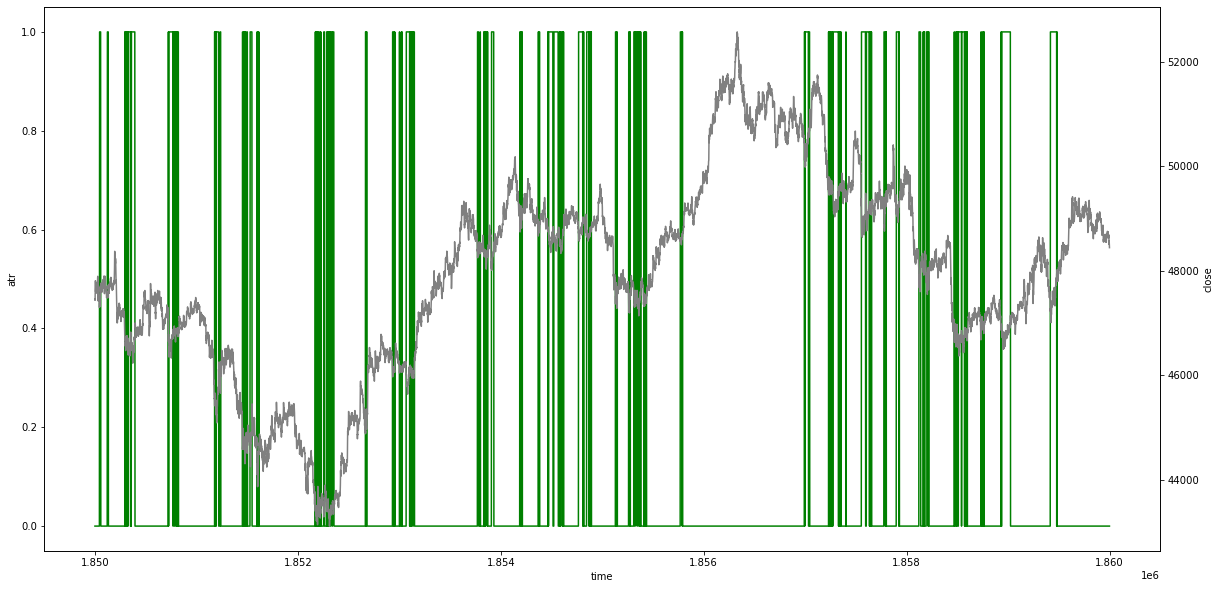

In [52]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.target,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [53]:
df.to_csv("../data/BTCUSDT-minute-target-ui.csv", index=False) #Default